In [13]:
from bs4 import BeautifulSoup, NavigableString
from urllib import request, error
from urllib.parse import urljoin, urlparse

import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

%matplotlib inline

In [2]:
def parse_url(url):
    try:
        print(url)
        html = request.urlopen(url)
        soup = BeautifulSoup(html, "html.parser")
        frame_srcs = [f["src"] for f in soup.find_all("frame")]
        if len(frame_srcs) == 0:
            return [soup]
        url_parts = urlparse(url)
        domain = url_parts.scheme + "://" + url_parts.netloc
        soups = [soup]
        for src in frame_srcs:
            path = urlparse(src)
            site_url = urljoin(domain, path.path) if path.scheme == "" else path.geturl()
            soups.append(parse_url(site_url))
        return list(itertools.chain.from_iterable(soups))
    except error.HTTPError as err:
        print(err)
        return []

In [3]:
def parse_tags(soups):
    tags = []
    for s in soups:
        if isinstance(s, NavigableString):
            continue
        tag = [tag.name for tag in s.find_all()]
        tags.append(tag)
    return list(itertools.chain.from_iterable(tags))

In [4]:
def to_tag_df(tags):
    return pd.DataFrame.from_records([[tag] for tag in tags], columns=["tag"])

In [9]:
MODERN_SITES = [
    "http://topmuseum.jp/",
    "http://www.adeahome.co.jp/",
    "https://comeheartplus.co.jp/",
    "http://bananawani.jp/",
    "https://www.banya-group.jp/",
    "https://biz.kddi.com/beconnected/",
    "http://menya-bibiri.net/",
    "https://www.jal.com/ja/csr/soraiku/steamschool/",
]

In [11]:
leg_soups = [parse_url(url) for url in LEGACY_SITES]
leg_tags = [parse_tags(s) for s in leg_soups]
leg_dfs = [to_tag_df(tags) for tags in leg_tags]
tag_count_dfs = [df.groupby("tag").size().sort_values() for df in leg_dfs]

http://topmuseum.jp/
http://www.adeahome.co.jp/
https://comeheartplus.co.jp/
http://bananawani.jp/
https://www.banya-group.jp/
https://biz.kddi.com/beconnected/
http://menya-bibiri.net/
https://www.jal.com/ja/csr/soraiku/steamschool/


In [14]:
if not os.path.exists("image/modern"):
    os.makedirs("image/modern")

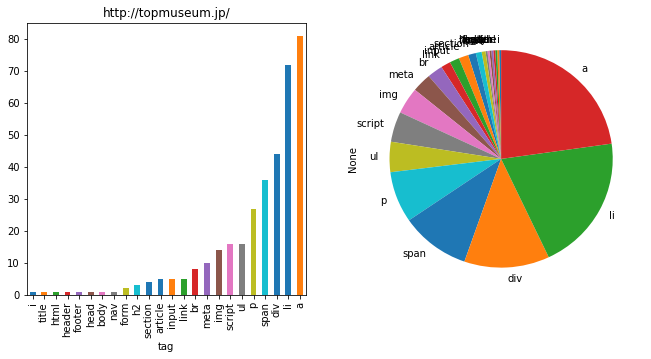

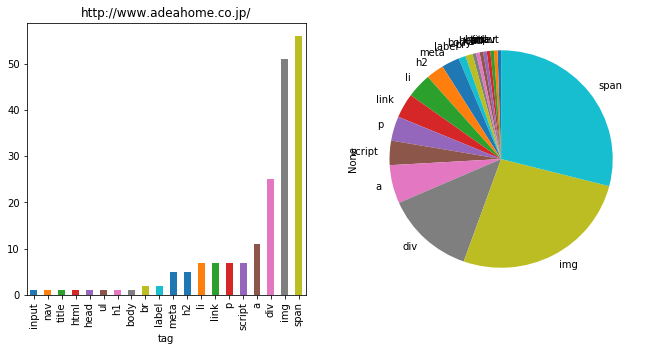

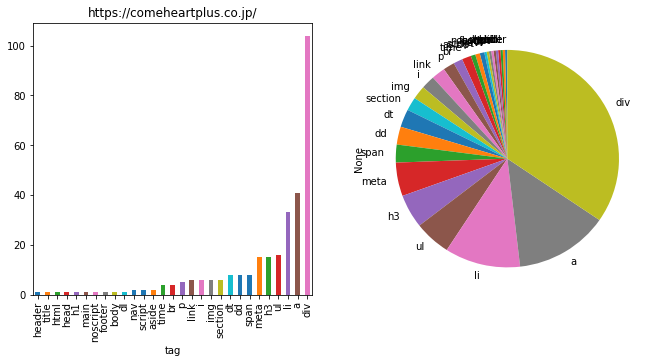

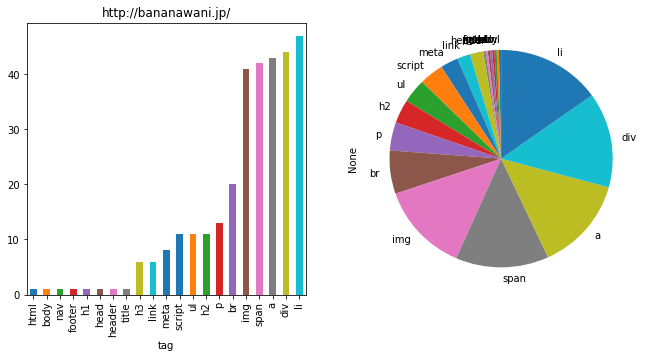

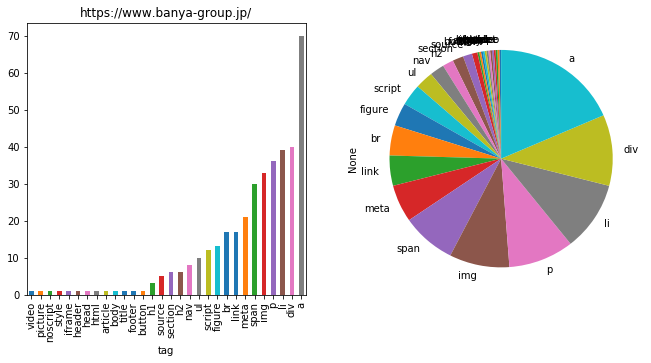

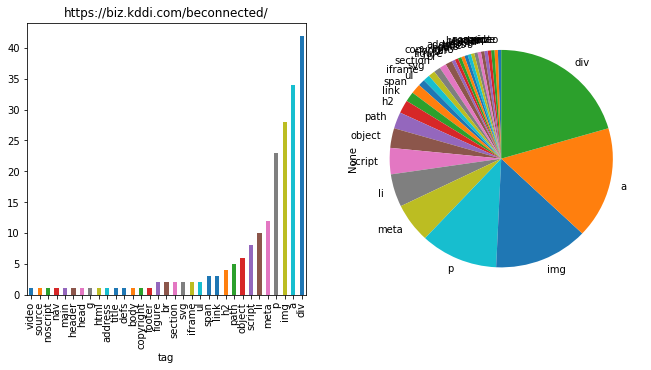

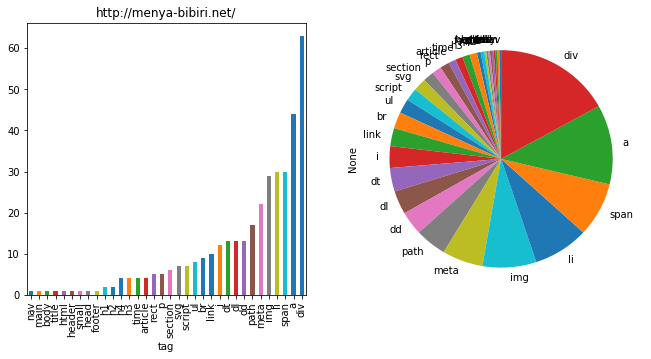

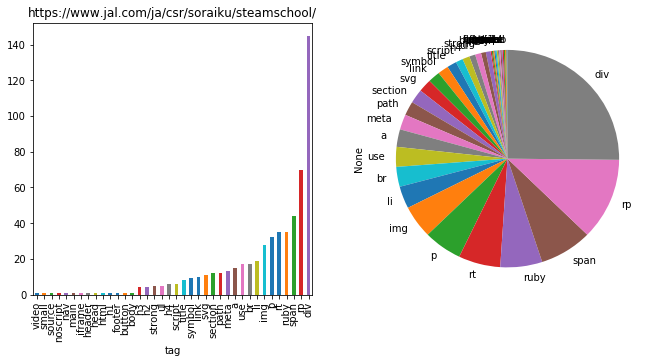

In [15]:
for i, (url, df) in enumerate(zip(MODERN_SITES, tag_count_dfs)):
    plt.figure(figsize=(11, 5))
    gs = gridspec.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_title(url)
    df.plot.bar(ax=ax1)
    ax2 = plt.subplot(gs[0, 1])
    df.plot.pie(ax=ax2, startangle=90)
    plt.savefig("image/modern/site_{}_bar.png".format(i + 1))
    plt.show()

In [18]:
import sys

for url, df in zip(MODERN_SITES, tag_count_dfs):
    print(url)
    df.to_csv(sys.stdout, sep='\t' )
    print("=================================")

http://topmuseum.jp/
i	1
title	1
html	1
header	1
footer	1
head	1
body	1
nav	1
form	2
h2	3
section	4
article	5
input	5
link	5
br	8
meta	10
img	14
script	16
ul	16
p	27
span	36
div	44
li	72
a	81
http://www.adeahome.co.jp/
input	1
nav	1
title	1
html	1
head	1
ul	1
h1	1
body	1
br	2
label	2
meta	5
h2	5
li	7
link	7
p	7
script	7
a	11
div	25
img	51
span	56
https://comeheartplus.co.jp/
header	1
title	1
html	1
head	1
h1	1
main	1
noscript	1
footer	1
body	1
dl	1
nav	2
script	2
aside	2
time	4
br	4
p	5
link	6
i	6
img	6
section	6
dt	8
dd	8
span	8
meta	15
h3	15
ul	16
li	33
a	41
div	104
http://bananawani.jp/
html	1
body	1
nav	1
footer	1
h1	1
head	1
header	1
title	1
h3	6
link	6
meta	8
script	11
ul	11
h2	11
p	13
br	20
img	41
span	42
a	43
div	44
li	47
https://www.banya-group.jp/
video	1
picture	1
noscript	1
style	1
iframe	1
header	1
head	1
html	1
article	1
body	1
title	1
footer	1
button	1
h1	3
source	5
section	6
h2	6
nav	8
ul	10
script	12
figure	13
br	17
link	17
meta	21
span	30
img	33
p	36
li	39
div	40
a	70

In [19]:
import functools
import numpy as np

tag_counts = list(map(lambda x: len(x.keys()), tag_count_dfs))
print(np.mean(tag_counts))

28.625


In [23]:
elem_counts = list(map(lambda x: x.values.sum(), tag_count_dfs))
print(np.mean(elem_counts))

336.625
